In this notebook, we contiune to build models by testing 6 layer CNN + MaxPooling with different drop out rates, testing 7 layer CNN + MaxPooling , and also using a pretrained model such as VGG16.  

Data source : https://www.kaggle.com/puneet6060/intel-image-classification

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.metrics import classification_report

In [2]:
image_path = "../input/intel-image-classification/seg_train/seg_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="training",
  seed=123)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="validation",
  seed=123)

test_path = "../input/intel-image-classification/seg_test/seg_test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  image_size=(224,224),
  batch_size=32)



Found 14034 files belonging to 6 classes.
Using 10526 files for training.
Found 14034 files belonging to 6 classes.
Using 3508 files for validation.
Found 3000 files belonging to 6 classes.


In [3]:
import glob
import pathlib 

data_dir = pathlib.Path(image_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


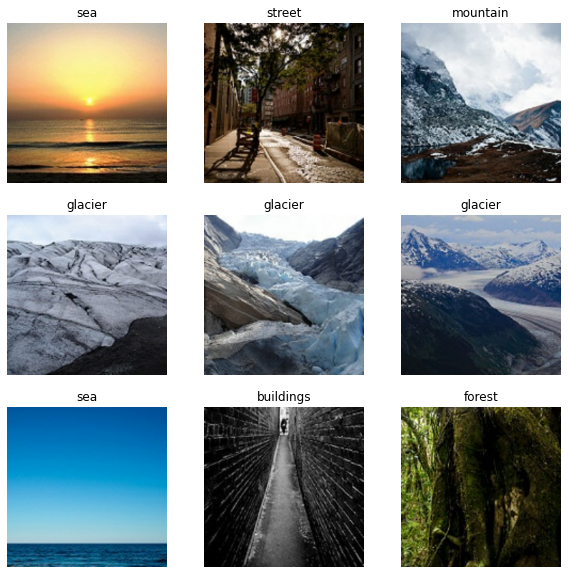

In [4]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

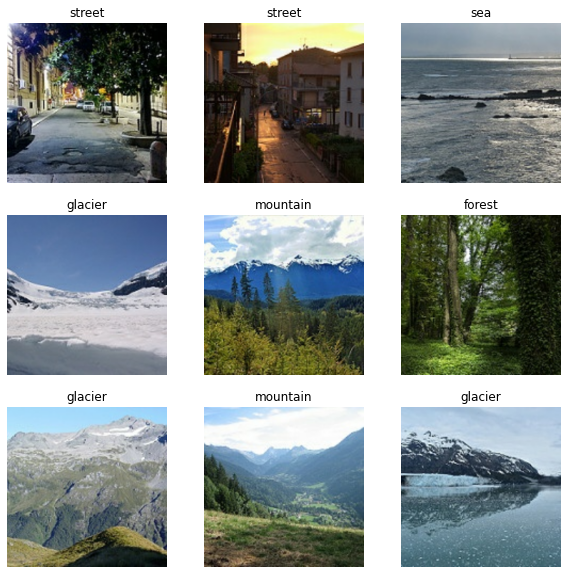

In [5]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

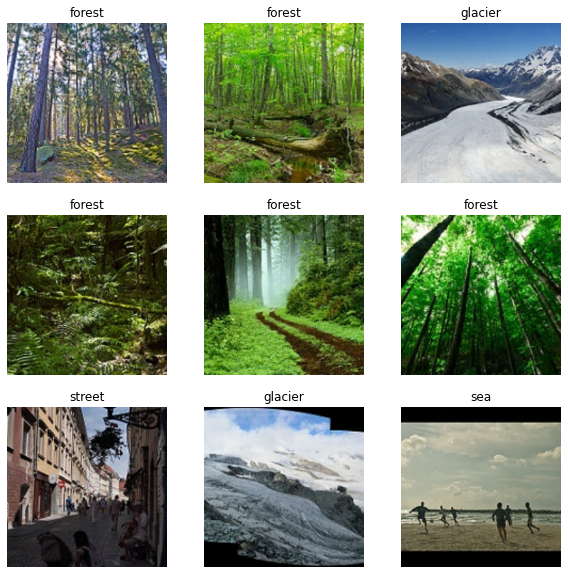

In [6]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

In [8]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images

pred_images = load_images_from_folder("../input/intel-image-classification/seg_pred/seg_pred")

In [9]:
type(pred_images)

list

In [10]:
pred_images = np.array(pred_images)
pred_images.shape

(7301, 224, 224, 3)

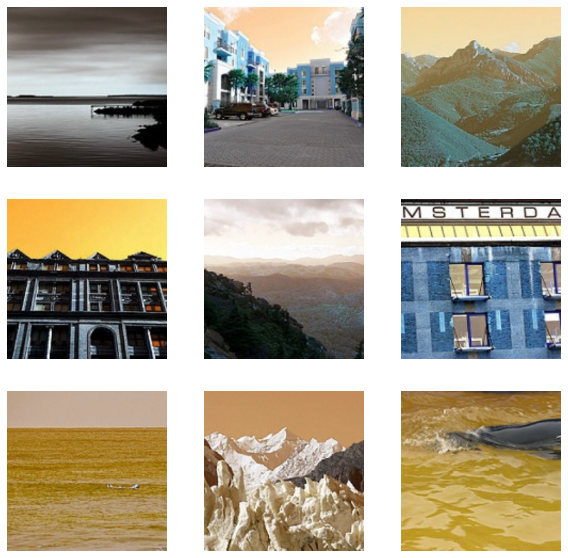

In [11]:
## visualize prediction images 
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pred_images[i])
    plt.axis("off")

Epoch 1/15
329/329 [==============================] - 241s 711ms/step - loss: 1.5128 - accuracy: 0.4393 - val_loss: 1.0996 - val_accuracy: 0.5576
Epoch 2/15
329/329 [==============================] - 168s 511ms/step - loss: 1.0158 - accuracy: 0.6059 - val_loss: 1.8238 - val_accuracy: 0.4133
Epoch 3/15
329/329 [==============================] - 168s 511ms/step - loss: 0.7548 - accuracy: 0.7048 - val_loss: 0.6809 - val_accuracy: 0.7437
Epoch 4/15
329/329 [==============================] - 168s 511ms/step - loss: 0.6693 - accuracy: 0.7450 - val_loss: 0.6180 - val_accuracy: 0.7697
Epoch 5/15
329/329 [==============================] - 168s 510ms/step - loss: 0.5933 - accuracy: 0.7819 - val_loss: 0.5797 - val_accuracy: 0.7722
Epoch 6/15
329/329 [==============================] - 168s 511ms/step - loss: 0.5426 - accuracy: 0.8016 - val_loss: 0.5290 - val_accuracy: 0.8101
Epoch 7/15
329/329 [==============================] - 168s 511ms/step - loss: 0.5009 - accuracy: 0.8228 - val_loss: 0.4941 -

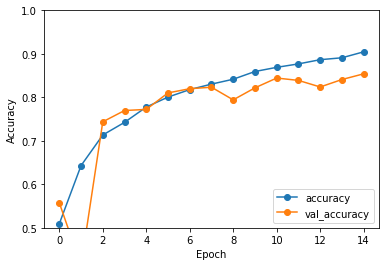

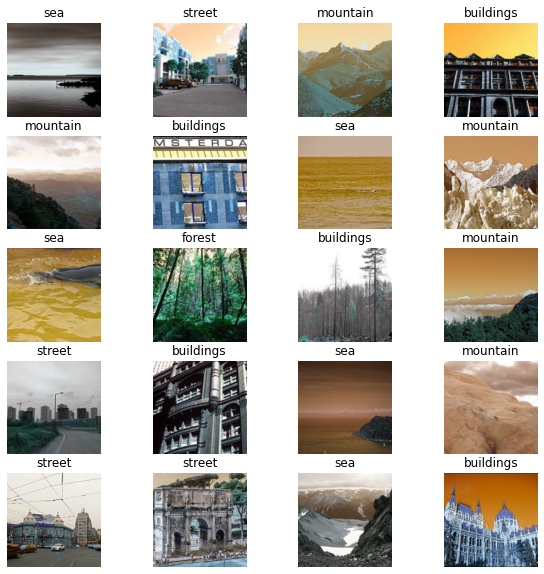

In [12]:
## Change the dropout rate to 0.1 
## 6 layer cnn + max pooling + batchnormalization
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(6, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=15, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn5')
##

## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
pred_images_prediction = model.predict(pred_images)
##
pred_images_class = []
for i in range(len(pred_images_prediction)):
    pred_images_class.append(np.argmax(pred_images_prediction[i], axis = -1))
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title(class_names[pred_images_class[i]])
    plt.axis("off")

Accuracy has increased further to 0.85 with dropout of 0.1

Epoch 1/25
329/329 [==============================] - 169s 511ms/step - loss: 1.5003 - accuracy: 0.4255 - val_loss: 1.6740 - val_accuracy: 0.3367
Epoch 2/25
329/329 [==============================] - 168s 510ms/step - loss: 1.0159 - accuracy: 0.5985 - val_loss: 1.7179 - val_accuracy: 0.3318
Epoch 3/25
329/329 [==============================] - 167s 508ms/step - loss: 0.8377 - accuracy: 0.6722 - val_loss: 0.8040 - val_accuracy: 0.6896
Epoch 4/25
329/329 [==============================] - 167s 509ms/step - loss: 0.7207 - accuracy: 0.7307 - val_loss: 1.1959 - val_accuracy: 0.5733
Epoch 5/25
329/329 [==============================] - 167s 508ms/step - loss: 0.6528 - accuracy: 0.7540 - val_loss: 0.6807 - val_accuracy: 0.7471
Epoch 6/25
329/329 [==============================] - 167s 508ms/step - loss: 0.5880 - accuracy: 0.7816 - val_loss: 0.6826 - val_accuracy: 0.7623
Epoch 7/25
329/329 [==============================] - 167s 509ms/step - loss: 0.5769 - accuracy: 0.7870 - val_loss: 0.6829 -

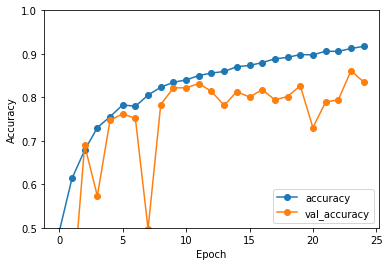

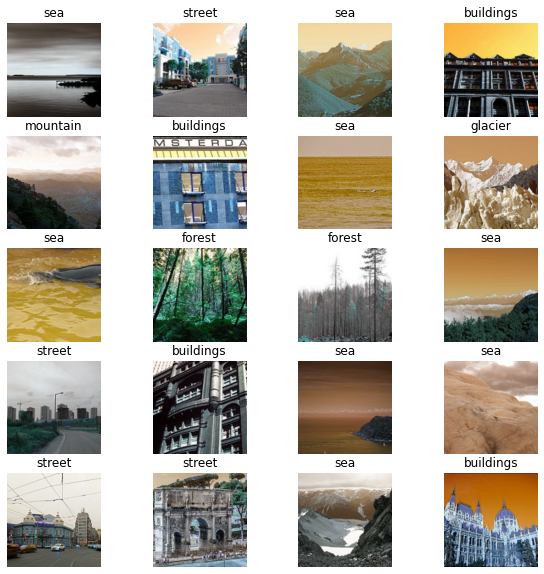

In [13]:
## change the dropout rate to 0.3
## 6 layer cnn + max pooling + batchnormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(6, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=25, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_dp0.3')
##

## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
pred_images_prediction = model.predict(pred_images)
##
pred_images_class = []
for i in range(len(pred_images_prediction)):
    pred_images_class.append(np.argmax(pred_images_prediction[i], axis = -1))
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title(class_names[pred_images_class[i]])
    plt.axis("off")

Accuracy reduced to 0.83 with dropout rate of 0.3.  

Best parameters : Learning rate of 0.001 and dropout rate of 0.1. 

Epoch 1/25
329/329 [==============================] - 172s 520ms/step - loss: 1.4202 - accuracy: 0.4496 - val_loss: 1.3617 - val_accuracy: 0.4401
Epoch 2/25
329/329 [==============================] - 171s 519ms/step - loss: 0.9774 - accuracy: 0.6143 - val_loss: 1.0664 - val_accuracy: 0.5707
Epoch 3/25
329/329 [==============================] - 171s 519ms/step - loss: 0.8766 - accuracy: 0.6574 - val_loss: 0.9162 - val_accuracy: 0.6354
Epoch 4/25
329/329 [==============================] - 172s 521ms/step - loss: 0.7292 - accuracy: 0.7159 - val_loss: 1.8127 - val_accuracy: 0.4912
Epoch 5/25
329/329 [==============================] - 171s 520ms/step - loss: 0.6642 - accuracy: 0.7489 - val_loss: 1.3782 - val_accuracy: 0.5459
Epoch 6/25
329/329 [==============================] - 171s 519ms/step - loss: 0.5917 - accuracy: 0.7773 - val_loss: 0.6003 - val_accuracy: 0.7594
Epoch 7/25
329/329 [==============================] - 170s 517ms/step - loss: 0.5921 - accuracy: 0.7820 - val_loss: 4.2842 -

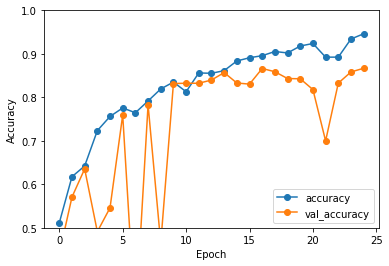

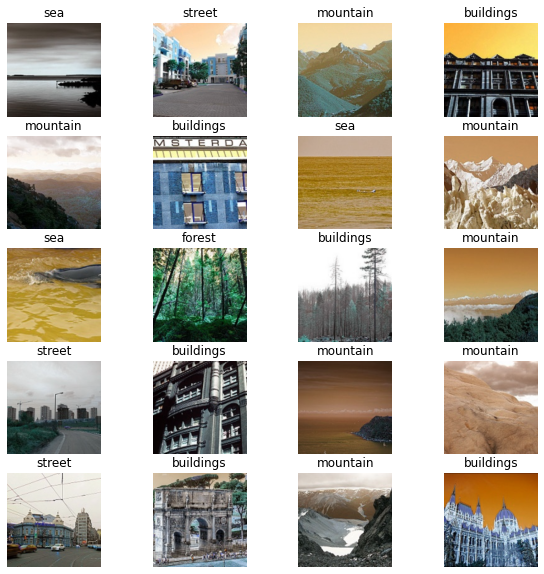

In [14]:
## Add another layer 
## 7 layer cnn + max pooling + batchnormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(6, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=25, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_7')
##

## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
pred_images_prediction = model.predict(pred_images)
##
pred_images_class = []
for i in range(len(pred_images_prediction)):
    pred_images_class.append(np.argmax(pred_images_prediction[i], axis = -1))
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title(class_names[pred_images_class[i]])
    plt.axis("off")

Accuracy has increased to 0.87 .  "Glacier" and "mountain" have lesser F1 score.  

In [16]:
## create a mask for the wrong predictions
mask = val_labels != val_pred
mask 

array([ True, False,  True, ..., False,  True, False])

In [22]:
dict_classes = {}
j = 0
for i in class_names:
    dict_classes[i] = j
    j = j+ 1
dict_classes

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [26]:
## labels that have been wrongly predicted.
wrong_classes = []
miss_predictions = val_labels[mask]
for i in miss_predictions:
    for key,value in dict_classes.items():
        if i == value:
            wrong_classes.append(key)
pd.Series(wrong_classes).value_counts()
            

mountain     101
glacier      100
buildings     84
street        55
sea           44
forest         9
dtype: int64

The above shows that mountain and glacier have the maximum mis-classifications

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 14,717,766
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 1620s 5s/step - loss: 5.7570 - accuracy: 0.2983 - val_loss: 1.0582 - val_accuracy: 0.5525
Epoch 2/10
329/329 [==============================] - 1574s 5s/step - loss: 1.0093 - accuracy: 0.5990 - val_loss: 0.8967 - val_accuracy: 0.6651
Epoch 3/10
329/329 [==============================] - 1574s 5s/step - loss: 0.8416 - accuracy: 0.6820 - val_loss: 0.7462 - val_accuracy: 0.7070
Epoch 4/10
329/329 [==============================] - 1574s 5s/step - lo

ValueError: Model <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f75ecd75c10> cannot be saved because the input shapes have not been set. Usually, input shapes are automatically determined from calling `.fit()` or `.predict()`. To manually set the shapes, call `model.build(input_shape)`.

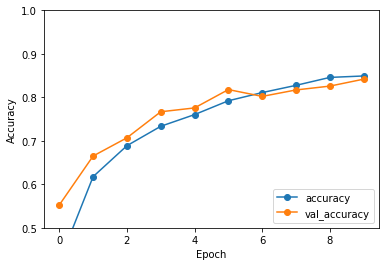

In [35]:
# Transfer learning with VGG16 . 
base_Net = tf.keras.applications.VGG16(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train_ds, validation_data = val_ds, epochs = 10)

##
test_loss, test_acc = model_Net.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_Net')
##

## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
pred_images_prediction = model_Net.predict(pred_images)
##
pred_images_class = []
for i in range(len(pred_images_prediction)):
    pred_images_class.append(np.argmax(pred_images_prediction[i], axis = -1))
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title(class_names[pred_images_class[i]])
    plt.axis("off")

In [ ]:
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
##
pred_images_prediction = model_Net.predict(pred_images)
##
pred_images_class = []
for i in range(len(pred_images_prediction)):
    pred_images_class.append(np.argmax(pred_images_prediction[i], axis = -1))
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title(class_names[pred_images_class[i]])
    plt.axis("off")

Classification Report
              precision    recall  f1-score   support

   buildings       0.75      0.86      0.80       437
      forest       0.95      0.98      0.96       474
     glacier       0.84      0.69      0.76       553
    mountain       0.75      0.82      0.78       525
         sea       0.84      0.83      0.83       510
      street       0.87      0.83      0.85       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



Transfer Learning with VGG16 , after 10 epochs has given an accuracy of 0.83 , similar to the 7 layer CNN + MaxPooling 